In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Fabi/master_dataset.csv', sep=',')

# location schools
loc = np.array([data['Longitude'], data['Latitude']]).T

In [5]:
data.columns

Index(['School_code', 'AgeID', 'School_name', 'Street', 'Town_suburb',
       'Postcode', 'Phone', 'School_Email', 'Website', 'Fax',
       'latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct',
       'ICSEA_value', 'Level_of_schooling', 'Selective_school',
       'Opportunity_class', 'School_specialty_type', 'School_subtype',
       'Support_classes', 'Preschool_ind', 'Distance_education',
       'Intensive_english_centre', 'School_gender', 'Late_opening_school',
       'Date_1st_teacher', 'LGA', 'Electorate', 'Fed_electorate',
       'Operational_directorate', 'Principal_network',
       'Operational_directorate_office',
       'Operational_directorate_office_phone',
       'Operational_directorate_office_address', 'FACS_district',
       'Local_health_district', 'AECG_region', 'ASGS_remoteness', 'Latitude',
       'Longitude', 'Assets unit', 'SA4', 'Healthy canteen', 'Date_extracted'],
      dtype='object')

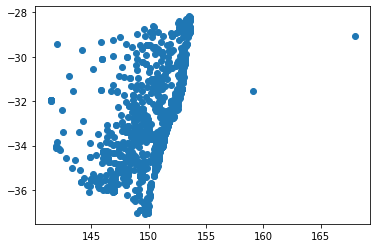

In [2]:
plt.scatter(loc[:,0], loc[:,1])

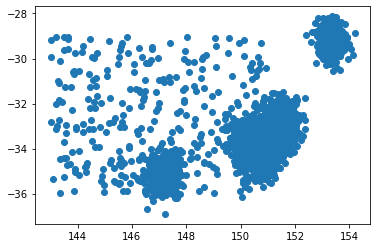

In [3]:
def teacher_loc_generator(n_teacher, p_outliers):
    #biggest cities NSW > 50k population
    # loc = long, lat
    loc = np.array([[151.209444, -33.865],
                   [151.75, -32.916667],
                   [151.2, -33.3],
                   [150.893915, -34.427243],
                   [151.55, -32.716667],
                   [150.3, -33.7],
                   [153.55, -29.183333],
                   [147.368889, -35.118889]])
    
    loc_new = np.resize(loc, (n_teacher,2) )
    
    loc_new[:,0] += np.random.normal(-0.2, 0.3, size=n_teacher)
    loc_new[:,1] += np.random.normal(0.0, 0.5, size=n_teacher)
    
    # generate 0% outliers
    loc_new[0:int(n_teacher*p_outliers),0] = np.random.uniform(143, 151, size=int(n_teacher*p_outliers))
    loc_new[0:int(n_teacher*p_outliers),1] = np.random.uniform(-36, -29, size=int(n_teacher*p_outliers))
    
    return loc_new

# location teachers
loc_t = teacher_loc_generator(3000, 0.1)

plt.scatter(loc_t[:,0], loc_t[:,1])

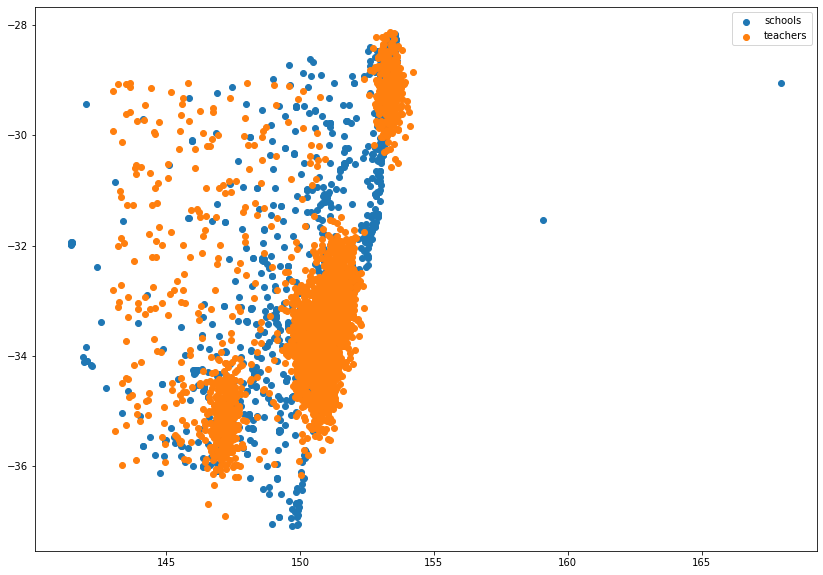

In [4]:
plt.figure(figsize=(14,10))
plt.scatter(loc[:,0], loc[:,1], label="schools")
plt.scatter(loc_t[:,0], loc_t[:,1], label="teachers")
plt.legend()

In [ ]:
#####################

In [14]:
n_students = data["latest_year_enrolment_FTE"]
teacher_per_school = 15
n_teachers = data["latest_year_enrolment_FTE"] / teacher_per_school
print(np.sum(n_teachers))

54002.52


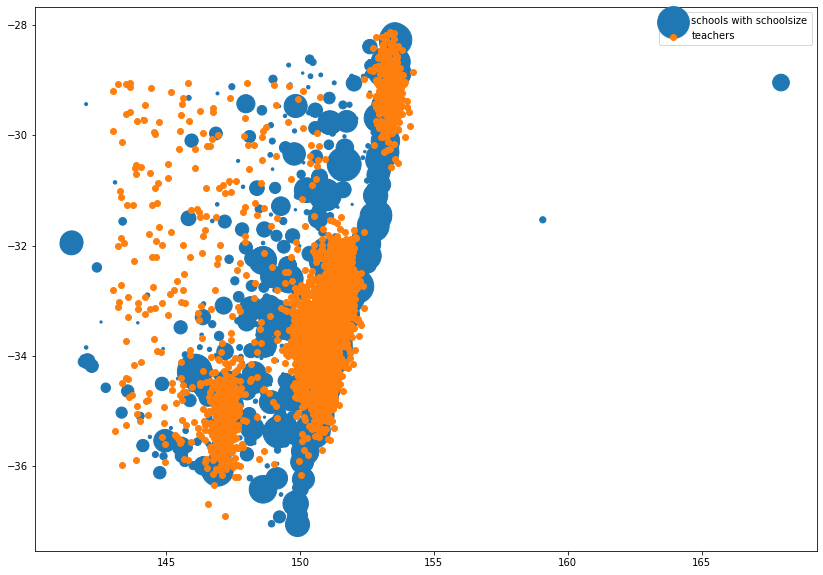

In [13]:
plt.figure(figsize=(14,10))
plt.scatter(loc[:,0], loc[:,1], s = n_students, label="schools with schoolsize")
plt.scatter(loc_t[:,0], loc_t[:,1], label="teachers")
plt.legend()

In [37]:
class CreateNSWDataset():
    def __init__(self, data, n_teachers=1000, school_teacher_ratio=1.2, teacher_per_school=15.,
                 std_dev_teacher_per_school=3., min_teachers_per_school=5, p_rural=0.3, p_car=0.7, p_experienced=0.4):
        self.data = data
        self.n_teachers = n_teachers
        #self.n_schools = int(n_teachers * school_teacher_ratio / teacher_per_school)        
        self.teacher_per_school = teacher_per_school
        self.std_dev_teacher_per_school = std_dev_teacher_per_school
        self.min_teachers_per_school = min_teachers_per_school
        self.p_rural = p_rural
        self.p_car = p_car
        self.p_experienced = p_experienced
        
        self.loc_teacher = self.__teacher_loc_generator(self.n_teachers, 0.1)
        
    def __teacher_loc_generator(self, n_teacher, p_outliers):
        #biggest cities NSW > 50k population
        # loc = long, lat
        loc = np.array([[151.209444, -33.865],
                       [151.75, -32.916667],
                       [151.2, -33.3],
                       [150.893915, -34.427243],
                       [151.55, -32.716667],
                       [150.3, -33.7],
                       [153.55, -29.183333],
                       [147.368889, -35.118889]])

        loc_new = np.resize(loc, (n_teacher,2) )

        loc_new[:,0] += np.random.normal(-0.2, 0.3, size=n_teacher)
        loc_new[:,1] += np.random.normal(0.0, 0.5, size=n_teacher)

        # generate 0% outliers
        loc_new[0:int(n_teacher*p_outliers),0] = np.random.uniform(143, 151, size=int(n_teacher*p_outliers))
        loc_new[0:int(n_teacher*p_outliers),1] = np.random.uniform(-36, -29, size=int(n_teacher*p_outliers))

        return loc_new

    def _createTeachers(self):
        x_location = self.loc_teacher[:,0]
        y_location = self.loc_teacher[:,1]
        rural = np.random.choice([0, 1], p=[1 - self.p_rural, self.p_rural], size=self.n_teachers)
        car = np.random.choice([0, 1], p=[1 - self.p_car, self.p_car], size=self.n_teachers)
        experienced = np.random.choice([0, 1], p=[1 - self.p_experienced, self.p_experienced], size=self.n_teachers)
        teachers = {'x_location': x_location,
                    'y_location': y_location,
                    'rural': rural,
                    'car': car,
                    'experienced': experienced,
                    }

        return teachers
    
    def _createSchools(self):
        loc_school = np.array([data['Longitude'], data['Latitude']]).T
        x_location = loc_school[:,0]
        y_location = loc_school[:,1]
        rural = np.random.choice([0, 1], p=[1 - self.p_rural, self.p_rural], size=len(loc_school))
        n_teachers = self.data["latest_year_enrolment_FTE"] / self.teacher_per_school
        
        schools = {'ID': range(len(loc_school)),
                   'x_location': x_location,
                   'y_location': y_location,
                   'rural': rural,
                   'n_teachers': n_teachers,
                   }

        return schools

    def make_dataset(self):
        teachers = pd.DataFrame(self._createTeachers())
        schools = pd.DataFrame(self._createSchools())

        return teachers, schools

In [38]:
DatasetSampler = CreateNSWDataset(data)
teachers, schools = DatasetSampler.make_dataset()

In [40]:
teachers.head()

,x_location,y_location,rural,car,experienced
0,143.033570,-35.367538,0,1,0
1,149.617464,-34.617230,1,1,0
2,144.529383,-33.624548,0,1,0
3,148.161254,-35.963156,0,1,1
4,147.933166,-34.246705,1,0,0


In [41]:
schools.head()

,ID,x_location,y_location,rural,n_teachers
0,0,151.131206,-33.852728,1,35.400000
1,1,150.888095,-32.166098,0,12.733333
2,2,151.426499,-32.808920,1,18.000000
3,3,148.776721,-35.993292,0,1.266667
4,4,151.730971,-32.932213,1,21.133333
